<a href="https://colab.research.google.com/github/physicaone/loss_IG/blob/master/%5B210617%5Dvisual_results6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base='drive/MyDrive'
except:
    base='Google Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [14]:
n_hid_list=[1, 2, 4, 8, 12, 24, 32]
T_list=[1.47, 1.78, 2.3, 5.2, 16]
T_color=['red', 'orange', 'green', 'blue', 'purple']
n_hid_color=['red', 'orange', 'yellow', 'green', 'skyblue','blue', 'purple']
n_beta=21

In [15]:
cum1=[]; cum2=[]; means=[]
Var1=[]; Var2=[]
for T in T_list:
    bias_tmp1=[]; bias_tmp2=[]; bias_tmp3=[]; var_tmp1=[]; var_tmp2=[]
    S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_T={T}_S0.pkl'.format(base=base, T=T))
    for n_hid in n_hid_list:
        bias_2nd_cumulant1=0; bias_2nd_cumulant2=0
        Variance1=0; Variance2=0
        if n_hid in [1,2,4,8,12]:
            FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_exact_rearranged.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
            dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_dE_exact_rearranged.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
            FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V_rearranged.pkl'.format(base=base, n_hid=n_hid, T=T))

        else:
            FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE_AISPT_rearranged.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
            dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE3_rearranged.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
            FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V_rearranged.pkl'.format(base=base, n_hid=n_hid, T=T))

        bias_CM=-S['CM']-FE['CM']+FE_V['CM']
        bias_mean=0

        for m in range(10):
            bias_CM_m=-S['CM_m'][str(m)]-FE['CM_m'][str(m)]+FE_V['CM_m'][str(m)]
            for n in range(10):
                bias_tmp_mn=-S['CM']-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)]
                Variance1+=(dE['CM'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM'])/100
                Variance2+=(dE['CM_m'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM_m'][str(m)])/100

                bias_2nd_cumulant1+=(bias_CM-bias_tmp_mn)**2 
                bias_2nd_cumulant2+=(bias_CM_m-bias_tmp_mn)**2
                bias_mean+=bias_tmp_mn/100
        bias_tmp1.append(bias_2nd_cumulant1)
        bias_tmp2.append(bias_2nd_cumulant2)
        bias_tmp3.append(bias_mean)
        var_tmp1.append(Variance1)
        var_tmp2.append(Variance2)
    cum1.append(bias_tmp1)
    cum2.append(bias_tmp2)
    means.append(bias_tmp3)
    Var1.append(var_tmp1)
    Var2.append(var_tmp2)


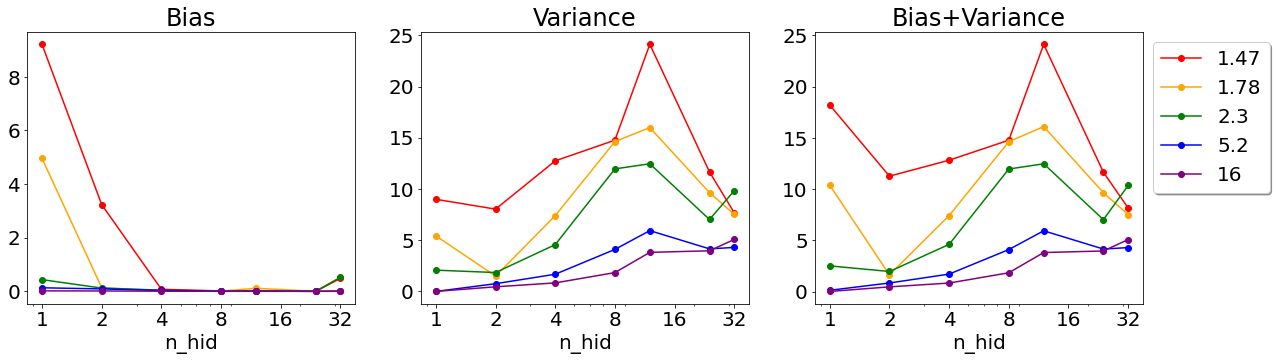

In [16]:
y_mark=[0,5,10,15,20]

plt.figure(figsize=(20,5))
alpha=0.5
plt.subplot(1, 3, 1)
plt.rcParams["font.size"] = "20"
plt.title('Bias')
plt.xscale('log')
plt.xlabel('n_hid')
# plt.ylim(y_mark[0],y_mark[-1])

# plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, means[i], '-o', c=T_color[i], label = T_list[i])

plt.xticks([1,2,4,8,16,32],[1,2,4,8,16,32])
# plt.yticks(y_mark, y_mark)

plt.subplot(1, 3, 2)
plt.rcParams["font.size"] = "20"
plt.title('Variance')
plt.xscale('log')
plt.xlabel('n_hid')

# plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, Var1[i], '-o', c=T_color[i], label = T_list[i])
plt.xticks([1,2,4,8,16,32],[1,2,4,8,16,32])
# plt.yticks(y_mark, y_mark)
# plt.ylim(y_mark[0],y_mark[-1])

plt.subplot(1, 3, 3)
plt.rcParams["font.size"] = "20"
plt.title('Bias+Variance')
plt.xscale('log')
# plt.yscale('log')
for i in range(len(T_list)):
    plt.plot(n_hid_list, (np.array(means)+np.array(Var1))[i], '-o', c=T_color[i], label = T_list[i])

plt.xlabel('n_hid')
# plt.ylim(y_mark[0],y_mark[-1])
plt.xticks([1,2,4,8,16,32],[1,2,4,8,16,32])
# plt.yticks(y_mark, y_mark)
plt.legend(T_list,  bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)

In [41]:
def get_df(T):
    dict0={}
    for m in range(10):
        dict0[str(m)]=[]
        for n in range(10):
            value1=[]; value2=[]; bias_list=[]
            for n_hid in n_hid_list:
                if n_hid in [1,2,4,8,12]:
                    FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_exact_rearranged.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
                    dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_dE_exact_rearranged.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
                    FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V_rearranged.pkl'.format(base=base, n_hid=n_hid, T=T))

                else:
                    FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_FE_AISPT.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
                    dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE3.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
                    FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
                S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_T={T}_S0.pkl'.format(base=base, T=T))

                value1.append(np.round(dE['CM_m'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM_m'][str(m)],3))
                value2.append(np.round(dE['CM'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM'],3))
                bias_list.append(np.round(-S['CM_m'][str(m)]-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)],3))

            dict0[str(m)].append({'var_CM':value2, 'var_CM_m':value1, 'bias':bias_list})
    df = pd.DataFrame(data=dict0)
    pd.set_option('display.max_colwidth', None)
    return df


In [42]:
# df.to_csv('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_T={T}_dataframe.csv'.format(base=base, T=T), index=range(10))

In [43]:
Bias_dict={}
for T in T_list:
    df=get_df(str(T))
    Bias_dict[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Bias_dict[str(T)][str(n_hid)]={}
        Bias_by_m=[]
        for m in range(10):
            Bias_mean=0
            for n in range(10):
                Bias_mean+=df[str(m)][n]['bias'][n_hid_index]/10
            Bias_by_m.append(Bias_mean)
        Bias_dict[str(T)][str(n_hid)]=Bias_by_m

Variance_dict_CM={}
for T in T_list:
    df=get_df(str(T))
    Variance_dict_CM[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Variance_dict_CM[str(T)][str(n_hid)]={}
        Variance_by_m=[]
        for m in range(10):
            Variance_mean=0
            for n in range(10):
                Variance_mean+=df[str(m)][n]['var_CM'][n_hid_index]/10
            Variance_by_m.append(Variance_mean)
        Variance_dict_CM[str(T)][str(n_hid)]=Variance_by_m

Variance_dict_CM_m={}
for T in T_list:
    df=get_df(str(T))
    Variance_dict_CM_m[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Variance_dict_CM_m[str(T)][str(n_hid)]={}
        Variance_by_m=[]
        for m in range(10):
            Variance_mean=0
            for n in range(10):
                Variance_mean+=df[str(m)][n]['var_CM_m'][n_hid_index]/10
            Variance_by_m.append(Variance_mean)
        Variance_dict_CM_m[str(T)][str(n_hid)]=Variance_by_m


FileNotFoundError: ignored

KeyError: ignored

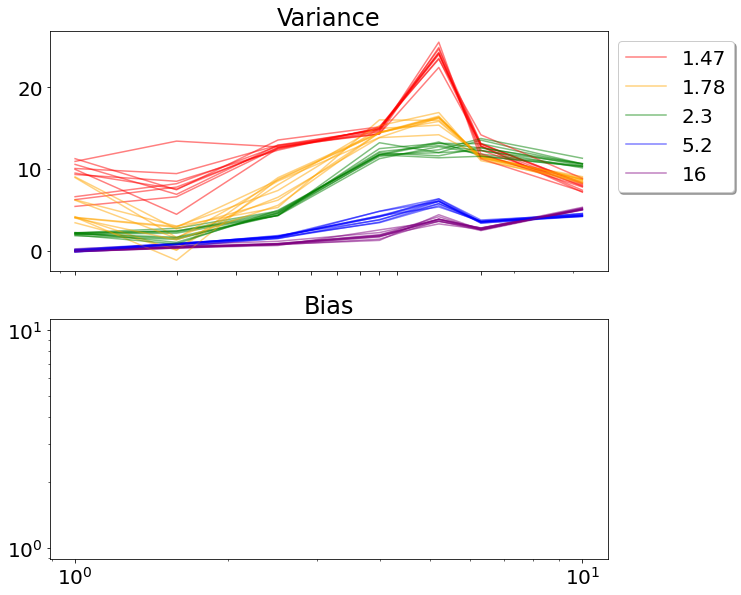

In [44]:
plt.figure(figsize=(10,15))
alpha=0.5
plt.subplot(3, 1, 1)
plt.rcParams["font.size"] = "20"
plt.title('Variance')
plt.xscale('log')
# plt.yscale('log')
for m in range(10):
    for t in range(len(T_list)):
        plt.plot(n_hid_list, np.array(list(Variance_dict_CM[str(T_list[t])].values())).transpose()[m], c=T_color[t], alpha=alpha)
plt.xticks([1,2,3,4,5,6,7,8,9,16],[])
plt.legend(T_list,  bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)
plt.subplot(3, 1, 2)
plt.rcParams["font.size"] = "20"
plt.title('Bias')
plt.xscale('log')
plt.yscale('log')
for m in range(10):
    for t in range(len(T_list)):
        plt.plot(n_hid_list, np.array(list(Bias_dict[str(T_list[t])].values())).transpose()[m], c=T_color[t], alpha=alpha)
plt.xticks([1,2,3,4,5,6,7,8,9,16],[])

plt.subplot(3, 1, 3)
plt.rcParams["font.size"] = "20"
plt.title('Bias+Variance')
plt.xscale('log')
for m in range(10):
    for t in range(len(T_list)):
        plt.plot(n_hid_list, np.array(list(Bias_dict[str(T_list[t])].values())).transpose()[m]+
             np.array(list(Variance_dict_CM[str(T_list[t])].values())).transpose()[m], c=T_color[t], label = T_list[t], alpha=alpha, linestyle='-')


plt.xlabel('n_hid')
plt.xticks([1,2,4,8,16,32],[1,2,4,8,16,32])

In [31]:
def get_hist(list00):
#     bins=range(int(min(list00)-1), int(max(list00)+1), 1)
    # bins=[0.001*(1.5**x) for x in range(29)]
    y1,x1,_ = plt.hist(list00, bins = 30, histtype='step')
    x1 = 0.5*(x1[1:]+x1[:-1])
    plt.close()
    return x1, y1

In [42]:
JSs={}
for T in T_list:

    JSs[str(T)]={}
    for n_hid in n_hid_list:
        JS=[]
        dE10000=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE10000.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))

        for i in range(100):
            i=str(i).zfill(2)
            for j in range(100):
                j=str(j).zfill(2)
                if i>j:
                    if i[0]==j[0]:
                        # if (dE10000[i][j]+dE10000[j][i])<0:
                        #     JS.append(0)
                        # else:
                        JS.append(0.5*(dE10000[i][j]+dE10000[j][i]))
                        # JS.append(dE10000[i][j]-FE['mn'][j[0]][j[1]]+FE['mn'][i[0]][i[1]])
        JSs[str(T)][str(n_hid)]=JS

In [20]:
JSs={}
for T in T_list:

    JSs[str(T)]={}
    for n_hid in n_hid_list:
        JS=[]
        dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE3.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))
        dEmn=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT{n_beta}_n_hid={n_hid}_T={T}_dE_mn2CM.pkl'.format(base=base, n_beta=n_beta, n_hid=n_hid, T=T))

        for m in range(10):
            for n in range(10):
                JS.append(0.5*(dE['CM'][str(m)][str(n)]+dEmn[str(m)][str(n)]))
        JSs[str(T)][str(n_hid)]=JS

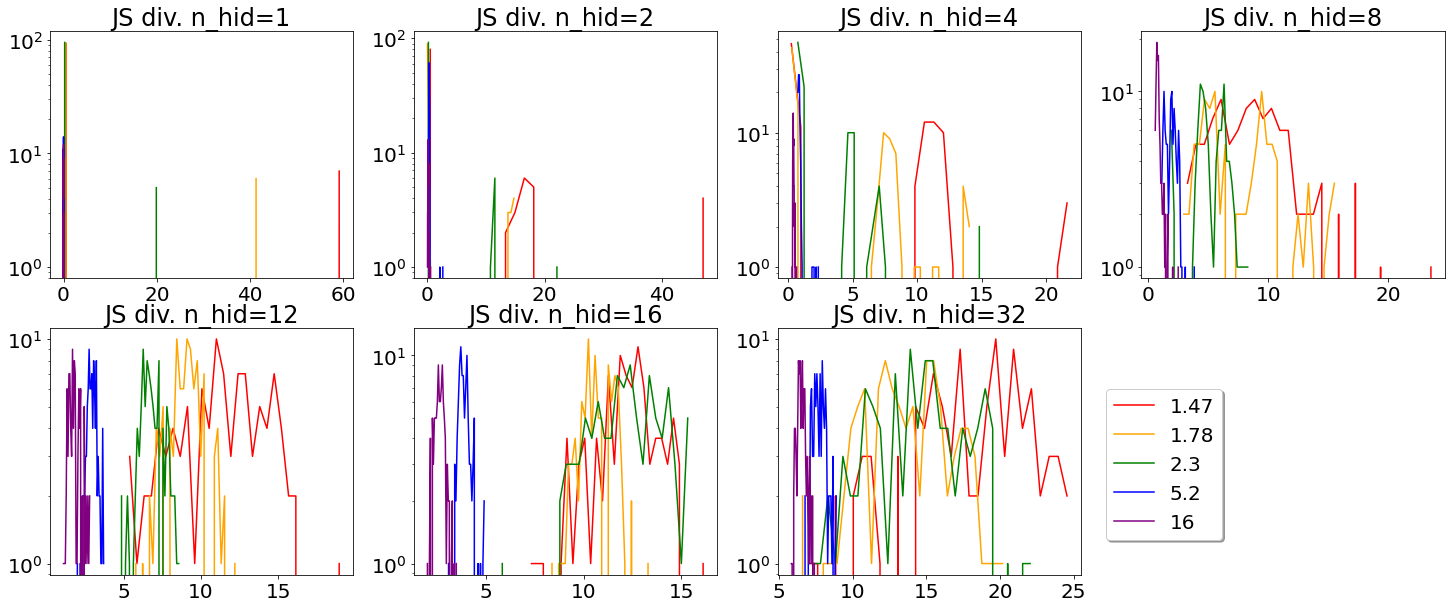

In [32]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(JSs[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(25,10))

for i in range(1, len(n_hid_list)+1):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 4, i)
    plt.rcParams["font.size"] = "20"
    plt.title('JS div. n_hid={n_hid}'.format(n_hid=n_hid))
    for t in range(len(T_list)):
        plt.plot(x_dict[str(T_list[t])][str(n_hid)], y_dict[str(T_list[t])][str(n_hid)], c=T_color[t], label = T_list[t])
    

    plt.yscale('log')
    # plt.xlim(0, 80)
    # plt.ylim(0, 60)
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.1), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)

In [10]:
n_vis=9
Weights={}
for T in T_list:
    Weights[str(T)]={}
    for n_hid in n_hid_list:
        Weight=[]
        params=pd.read_pickle('{base}/loss_IG/3*3/state_dict/n_hid={n_hid}_T={T}_mn.pkl'.format(base=base, n_hid=n_hid, T=T))
        for m in range(10):
            for n in range(10):
                Weight=Weight+params[str(m)][str(n)]['W'].view(n_hid*n_vis).tolist()
        Weights[str(T)][str(n_hid)]=Weight

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled

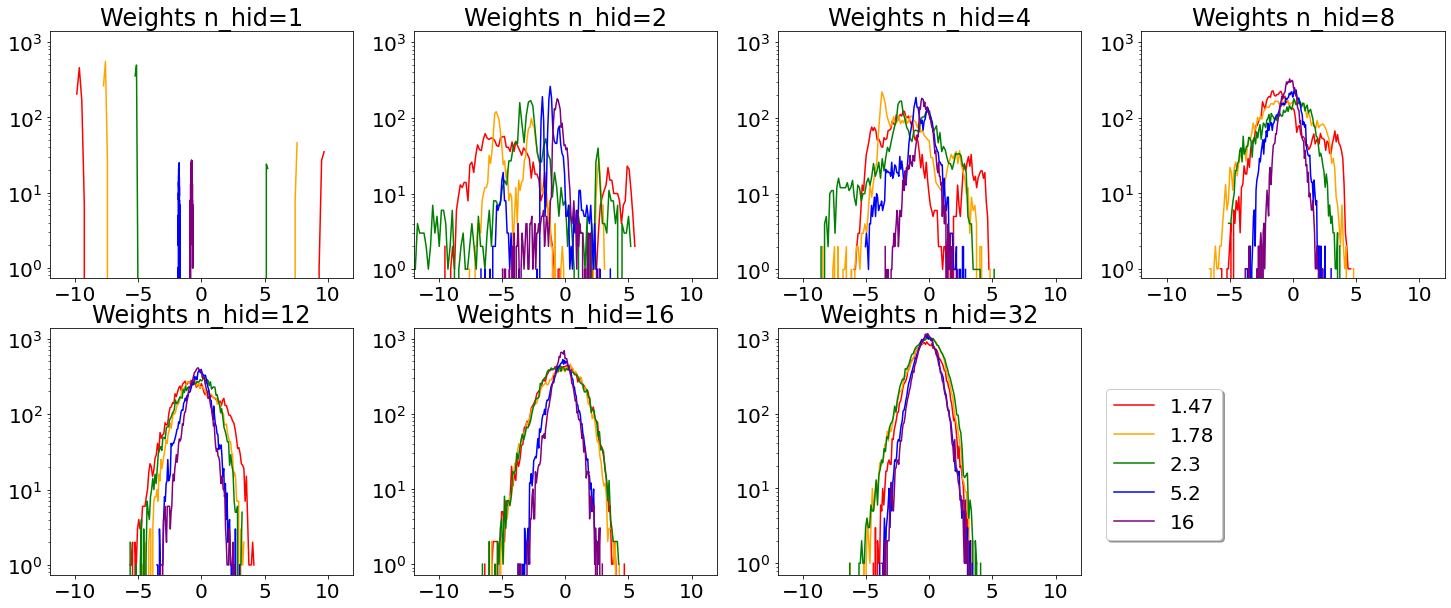

In [20]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(Weights[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(25,10))

for i in range(1, len(n_hid_list)+1):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 4, i)
    plt.rcParams["font.size"] = "20"
    plt.title('Weights n_hid={n_hid}'.format(n_hid=n_hid))
    for t in range(len(T_list)):
        plt.plot(x_dict[str(T_list[t])][str(n_hid)], y_dict[str(T_list[t])][str(n_hid)], c=T_color[t], label = T_list[t])
    

    plt.yscale('log')
    plt.xlim(-12, 12)
    plt.ylim(0, 1400)
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.1), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)